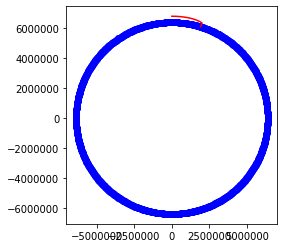

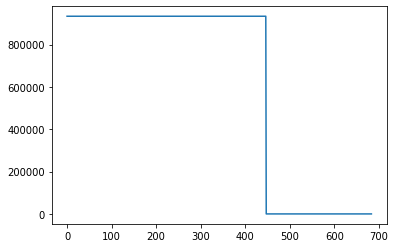

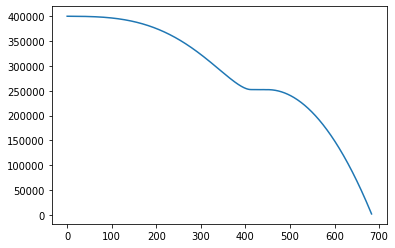

<function matplotlib.pyplot.show(*args, **kw)>

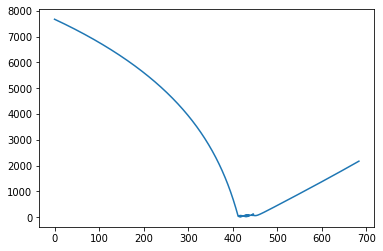

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#Define constants

earth_rad=6.371e6 #m
m_earth=5.972e24 #kg

G=6.67408e-11 #m3 kg-1 s-2

t=0 #s
dt=1 #s

#Merlin 1D Stage 2 Values

exhaust_vel=3743 #m/s
m_payload=3e3 #kg
m_fuselage=4500 #kg
m_fuel=111500 #kg



#Makes a circle plot of earth
theta=np.linspace(0,2*np.pi,1001) 
x_earth=earth_rad*np.sin(theta)
y_earth=earth_rad*np.cos(theta)

#Initialize rocket positon and velocity
rocket_pos=np.array([0,earth_rad+4e5]) #m
rocket_vel=np.array([7.6725e3,0]) #m/s

#Lists to track the rocket's kinematics
time=[]
x_rocket=[]
y_rocket=[]
Thrust_dir=[]
x_thrust=[]
y_thrust=[]
altitude=[]
speed=[]

flag=1 #1 means true
while(flag):
    if m_fuel>0:
        dm=249.5 #kg/s
        direction=-1
    else:
        dm=0 #kg/s
            
    time.append(t) #records time
    x_rocket.append(rocket_pos[0]) #records x position in array
    y_rocket.append(rocket_pos[1]) #records y position in array
    thrust=rocket_vel/np.linalg.norm(rocket_vel)*direction*exhaust_vel*dm #Calculates thrust using dm: direction variable indicates forward or backward thrust
    Thrust_dir.append(np.linalg.norm(thrust)) #records thrust in list
    altitude.append(np.linalg.norm(rocket_pos)-earth_rad)
    speed.append(np.linalg.norm(rocket_vel)) #records speed
    x_thrust.append(thrust[0])
    y_thrust.append(thrust[1])
    Fg=-G*m_earth*(m_fuselage+m_fuel)*rocket_pos/np.linalg.norm(rocket_pos)**3 #Calculates gravity
    accel=(Fg+thrust)/(m_fuselage+m_fuel) #Newton's second law: calculate acceleration using net force
    rocket_vel+=accel*dt #Increment velocity
    rocket_pos+=rocket_vel*dt #Increment position
    t+=dt #Increment time
    m_fuel-=dm #Subtract fuel
    
    if np.linalg.norm(rocket_pos) < earth_rad: #Exit condition is groundstrike
        flag=0 #Ends loop at that time
        
#Plots the earth on the graph for reference        
plt.plot(x_earth,y_earth,'ob')
plt.gca().set_aspect('equal')
plt.plot(x_rocket,y_rocket,'-r')
plt.show()

#Thrust vs. time graph
plt.figure()
plt.plot(time,Thrust_dir)
plt.show()

#Altitude vs. time graph
plt.figure()
plt.plot(time,altitude)
plt.show()

#Speed vs. time graph
plt.figure()
plt.plot(time,speed)
plt.show



In [20]:
print("x_rocket=",x_rocket)

x_rocket= [0.0, 7664.449323275862, 15320.820780904076, 22969.087129770603, 30609.221072219418, 38241.19525569764, 45864.98227239728, 53480.55465889353, 61087.88489577956, 68686.94540729786, 76277.70856096792, 83860.14666721055, 91434.23197896835, 98999.93669132273, 106557.23294110711, 114106.09280651658, 121646.48830671364, 129178.39140143027, 136701.7739905662, 144216.60791378326, 151722.86495009583, 159220.51681745754, 166709.53517234378, 174189.8916093303, 181661.55766066792, 189124.50479585293, 196578.70442119346, 204024.12787937178, 211460.74644900236, 218888.53134418558, 226307.45371405737, 233717.4846423343, 241118.59514685455, 248510.7561791142, 255893.9386237993, 263268.1132983134, 270633.2509523005, 277989.3222671633, 285336.29785557714, 292674.1482609989, 300002.8439571713, 307322.35534762277, 314632.65276516177, 321933.706471367, 329225.48665607214, 336507.96343684604, 343781.1068584675, 351044.88689239527, 358299.27343623264, 365544.2363131872, 372779.7452715252, 380005.76

In [19]:
print("y_rocket=",y_rocket)

y_rocket= [6771000.0, 6770991.306281384, 6770973.927990027, 6770947.874332046, 6770913.154574068, 6770869.7780435, 6770817.7541288, 6770757.092279757, 6770687.802007772, 6770609.892886137, 6770523.374550323, 6770428.256698275, 6770324.549090698, 6770212.261551362, 6770091.403967397, 6769961.986289599, 6769824.018532739, 6769677.510775873, 6769522.47316266, 6769358.91590168, 6769186.849266753, 6769006.283597273, 6768817.229298533, 6768619.696842064, 6768413.69676597, 6768199.239675274, 6767976.336242261, 6767744.997206835, 6767505.233376867, 6767257.055628562, 6767000.474906818, 6766735.502225595, 6766462.148668288, 6766180.425388107, 6765890.343608453, 6765591.91462331, 6765285.149797633, 6764970.060567744, 6764646.658441733, 6764314.954999861, 6763974.961894977, 6763626.690852922, 6763270.1536729615, 6762905.362228202, 6762532.328466022, 6762151.064408515, 6761761.58215292, 6761363.893872076, 6760958.011814869, 6760543.948306693, 6760121.715749906, 6759691.326624308, 6759252.793487605

In [27]:
print("x_thrust=",x_thrust)

x_thrust= [-933878.5, -933877.8992286585, -933876.0943809156, -933873.0816380902, -933868.8571571679, -933863.4170705521, -933856.7574858144, -933848.8744854402, -933839.7641265733, -933829.4224407567, -933817.8454336704, -933805.0290848672, -933790.9693475047, -933775.6621480747, -933759.1033861298, -933741.2889340066, -933722.2146365455, -933701.8763108081, -933680.2697457906, -933657.3907021359, -933633.2349118383, -933607.7980779501, -933581.0758742802, -933553.0639450925, -933523.7579047994, -933493.1533376513, -933461.2457974241, -933428.0308071009, -933393.503858553, -933357.6604122136, -933320.4958967506, -933282.0057087342, -933242.1852123003, -933201.0297388118, -933158.5345865126, -933114.6950201815, -933069.5062707785, -933022.963535088, -932975.0619753598, -932925.7967189417, -932875.1628579114, -932823.1554487023, -932769.7695117238, -932715.0000309799, -932658.8419536793, -932601.2901898446, -932542.3396119128, -932481.9850543352, -932420.2213131675, -932357.0431456591, 

In [28]:
print("y_thrust=",y_thrust)

y_thrust= [-0.0, 1059.2896286702191, 2119.6948122654053, 3181.218952974425, 4243.865480334507, 5307.637851439033, 6372.539551147546, 7438.574092298039, 8505.745015921515, 9574.055891458895, 10643.51031698026, 11714.111919406536, 12785.864354733547, 13858.77130825859, 14932.836494809464, 16008.063658976076, 17084.45657534461, 18162.01904873429, 19240.754914436824, 20320.66803845854, 21401.762317765202, 22484.041680529688, 23567.51008638237, 24652.171526664493, 25738.030024684278, 26825.08963597612, 27913.35444856269, 29002.828583220093, 30093.516193746083, 31185.42146723145, 32278.548624334497, 33372.90191955881, 34468.4856415343, 35565.30411330147, 36663.36169259916, 37762.662772155665, 38863.21177998329, 39965.013179676534, 41068.07147071376, 42172.391188762515, 43277.97690598861, 44384.8332313689, 45492.96481100784, 46602.37632845805, 47713.07250504459, 48825.05810019348, 49938.33791176406, 51052.91677638564, 52168.79956979818, 53285.991207197374, 54404.49664358396, 55524.32087411743